In [2]:
import sys
print(sys.executable)

C:\Users\mkrishne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [ ]:
!{sys.executable} -m pip install trimesh pyglet shapely pillow matplotlib scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/736.5 kB ? eta -:--:--
   --------------------------------------- 736.5/736.5 kB 23.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------  1.0/1.0 MB 32.7 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 21.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   --------------------------- ------------ 1.2/1.7 MB 37.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 22.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.7 MB 17.1 MB/s eta 0:00:03
   ---------------------------------------- 0.3/38.7 MB 17.1 MB/s eta 0:00:03
   ----------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\mkrishne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
!{sys.executable} -m pip install rtree


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\mkrishne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import trimesh
import matplotlib.pyplot as plt

In [37]:
import trimesh

# Load the mesh
tokyo_mesh = trimesh.load("a_3DMap_Data/buildings.obj")

# Show some infos
print(tokyo_mesh)

# Simple matplotlib 3D plot
#tokyo_mesh.show()

<trimesh.Trimesh(vertices.shape=(2564689, 3), faces.shape=(3170984, 3))>


In [14]:
pwd

'c:\\Users\\mkrishne\\OneDrive - purdue.edu\\ECNDATA\\Desktop\\PL_competition'

In [11]:
import pandas as pd
import numpy as np
import os

# Parameters
freqs = ["800MHz", "7GHz", "28GHz"]
txids = [5,9,12,14,20]

# Base input/output directories
base_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\c_evaluation_propagation_loss"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test"

# Frequency lookup table in Hz
freq_map = {
    "800MHz": 8e8,
    "7GHz": 7e9,
    "28GHz": 28e9
}

for freq in freqs:
    for tx_id in txids:
        csv_file = os.path.join(base_dir, freq, f"{freq}_Tx_{tx_id}.csv")
        if not os.path.exists(csv_file):
            print(f"⚠️ File not found: {csv_file}")
            continue

        # Load data
        df = pd.read_csv(csv_file)

        # TX position (first row, columns 0–2)
        tx = df.iloc[0, [0, 1, 2]].values.astype(float)
        tx_height = tx[2]

        # RX coordinates (columns 6–8)
        rx_all = df.iloc[:, [6, 7, 8]].values.astype(float)

        # Distance in meters
        dists = np.linalg.norm(rx_all - tx, axis=1)

        # Frequency in Hz
        f = freq_map[freq]

        # Free-Space Path Loss (FSPL) [dB]
        fspl = 20 * np.log10(dists) + 20 * np.log10(f) - 147.55  # (4πd/λ)

        # 3GPP Urban Micro (UMi) LOS Path Loss [dB]
        # PL_UMi_LOS = 32.4 + 21*log10(d_3D) + 20*log10(f_GHz)
        f_GHz = f / 1e9
        pl_umi = 32.4 + 21 * np.log10(dists) + 20 * np.log10(f_GHz)

        # Measured Path Loss (column 12)
        pathloss = df.iloc[:, 12].values.astype(float)

        # Combine into output dataframe
        output_df = pd.DataFrame({
            "distance_m": dists,
            "fspl_dB": fspl,
            "umi_pathloss_dB": pl_umi,
            "tx_height_m": tx_height,
            "measured_pathloss_dB": pathloss
        })

        # Save result
        output_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_test_data.csv")
        output_df.to_csv(output_file, index=False)
        print(f"✅ Saved: {output_file}")


✅ Saved: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_5_test_data.csv
✅ Saved: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_9_test_data.csv
✅ Saved: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_12_test_data.csv
✅ Saved: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_14_test_data.csv
✅ Saved: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_20_test_data.csv
✅ Saved: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\7GHz_Tx_5_test_data.csv
✅ Saved: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\7GHz_Tx_9_test_data.csv
✅ Saved: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\

In [33]:
import numpy as np

file_path = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train\800MHz_Tx_1\pair00000_fresnel1.npz"

# Allow pickle
data = np.load(file_path, allow_pickle=True)

print("🔹 Keys in NPZ file:")
print(list(data.keys()))
print("\n")

for key in data.files:
    arr = data[key]
    print(f"▶ {key}: type={type(arr)}, shape={getattr(arr, 'shape', 'N/A')}")
    
    # Print sample preview depending on data type
    if isinstance(arr, np.ndarray):
        if arr.size > 10:
            print("Sample values:", arr.flat[:10], "...")
        else:
            print("Values:", arr)
    elif isinstance(arr, (list, tuple)):
        print("List sample:", arr[:5], "..." if len(arr) > 5 else "")
    elif isinstance(arr, dict):
        print("Dict keys:", list(arr.keys())[:5])
    else:
        print("Value:", arr)
    
    print("-" * 60)


🔹 Keys in NPZ file:
['polys', 'Tx', 'Rx', 'f_hz', 'lam', 'D', 'T', 'region', 'faces_used']


▶ polys: type=<class 'numpy.ndarray'>, shape=(163,)
Sample values: [array([[4247.34375 , 2612.5     ,   37.900002],
        [4240.375   , 2606.25    ,   37.900002],
        [4239.3125  , 2607.5     ,   37.900002]])
 array([[4247.34375 , 2612.5     ,   37.900002],
        [4239.3125  , 2607.5     ,   37.900002],
        [4230.53125 , 2599.5     ,   37.900002]])
 array([[4247.34375   , 2612.5       ,   37.900002  ],
        [4230.53125   , 2599.5       ,   37.900002  ],
        [4232.36135578, 2597.4630127 ,   37.900002  ],
        [4244.95055437, 2609.42222595,   37.900002  ]])
 array([[4247.34375   , 2612.5       ,   37.900002  ],
        [4244.95055437, 2609.42222595,   37.900002  ],
        [4246.9836266 , 2611.38634109,   37.900002  ]])
 array([[4247.34375   , 2612.5       ,   37.900002  ],
        [4246.9836266 , 2611.38634109,   37.900002  ],
        [4247.71275759, 2612.09281921,   37.900

In [38]:
import pandas as pd
import numpy as np
import os
import trimesh

# Parameters
freqs = ["800MHz", "7GHz", "28GHz"]
txids = [1, 2, 8, 18, 19]

# Directories
base_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\b_training_propagation_loss"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train"

# Coordinate shift bounds (from global reference)
xmin, ymin = 384592.1875, 3944795.0
xmax, ymax = 391455.15625, 3952352.5

# Global RX–TX bounding box (already known, XY only)
rx_tx_bbox_min = np.array([3035.3125, 2217.5])
rx_tx_bbox_max = np.array([6180.3125, 5947.5])

# -------------------------------------------------------------------
# Load and crop the Tokyo mesh ONCE globally
# -------------------------------------------------------------------

# Shift all vertices so that (xmin, ymin) becomes origin
vertices = tokyo_mesh.vertices.copy()
faces = tokyo_mesh.faces
shifted_vertices = vertices - np.array([xmin, ymin, 0])
city_vertices_full = shifted_vertices
city_faces_full = faces

# Crop to global bounding box
print(f"🧭 Cropping global submesh within bbox: {rx_tx_bbox_min} → {rx_tx_bbox_max}")
face_vertices_full = city_vertices_full[city_faces_full]  # (num_faces, 3, 3)
mask_inside = np.any(
    (face_vertices_full[:, :, 0] >= rx_tx_bbox_min[0]) &
    (face_vertices_full[:, :, 0] <= rx_tx_bbox_max[0]) &
    (face_vertices_full[:, :, 1] >= rx_tx_bbox_min[1]) &
    (face_vertices_full[:, :, 1] <= rx_tx_bbox_max[1]),
    axis=1
)
city_faces_inside = city_faces_full[mask_inside]
unique_vertices_inside = np.unique(city_faces_inside)
city_vertices_inside = city_vertices_full[unique_vertices_inside]

vertex_reindex_inside = {old: new for new, old in enumerate(unique_vertices_inside)}
city_faces_inside_reindexed = np.vectorize(vertex_reindex_inside.get)(city_faces_inside)

# Build the global cropped mesh
submesh = trimesh.Trimesh(
    vertices=city_vertices_inside,
    faces=city_faces_inside_reindexed,
    process=False
)

print(f"✅ Cropped mesh ready: {len(city_vertices_inside):,} vertices, {len(city_faces_inside_reindexed):,} faces")


🧭 Cropping global submesh within bbox: [3035.3125 2217.5   ] → [6180.3125 5947.5   ]
✅ Cropped mesh ready: 829,663 vertices, 1,024,496 faces


In [ ]:
freqs = ["800MHz", "7GHz", "28GHz"]
txids = [1, 2, 8, 18, 19]
freqs = ["800MHz"]
txids = [1]
base_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\b_training_propagation_loss"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train"

for freq in freqs:
    for tx_id in txids:
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_train_data.csv")
        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing file: {input_file}")
            continue

        print(f"\n▶ Processing LOS features for {freq} | Tx {tx_id}")

        df = pd.read_csv(input_file)

        raw_file = os.path.join(base_dir, freq, f"{freq}_Tx_{tx_id}.csv")
        if not os.path.exists(raw_file):
            print(f"⚠️ Missing base file: {raw_file}")
            continue

        raw_df = pd.read_csv(raw_file)
        tx = raw_df.iloc[0, [0, 1, 2]].values.astype(float)
        rx_all = raw_df.iloc[:, [6, 7, 8]].values.astype(float)

        # Shift TX/RX coordinates to local frame (same as mesh)
        tx_shifted = tx.copy()
        tx_shifted[0] -= xmin
        tx_shifted[1] -= ymin
        rx_shifted = rx_all.copy()
        rx_shifted[:, 0] -= xmin
        rx_shifted[:, 1] -= ymin

        # --- Compute LOS features ---
        intersection_counts = []
        distances_to_intersection = []
        los_flags = []
        total_points = len(rx_shifted)

        for i, rx_pt in enumerate(rx_shifted):
            ray_dir = tx_shifted - rx_pt
            ray_len = np.linalg.norm(ray_dir)

            if ray_len == 0:
                intersection_counts.append(0)
                distances_to_intersection.append(0)
                los_flags.append(0)
                continue

            ray_dir /= ray_len

            try:
                locs, _, _ = submesh.ray.intersects_location(
                    ray_origins=rx_pt[None, :],
                    ray_directions=ray_dir[None, :]
                )
            except Exception as e:
                print(f"⚠️ Raycast failed at RX {i}: {e}")
                intersection_counts.append(np.nan)
                distances_to_intersection.append(np.nan)
                los_flags.append(np.nan)
                continue

            n_intersections = len(locs)
            intersection_counts.append(n_intersections)

            if n_intersections == 0:
                distances_to_intersection.append(np.nan)
                los_flags.append(1)
            else:
                dist_first = np.linalg.norm(locs[0] - rx_pt)
                distances_to_intersection.append(dist_first)
                los_flags.append(int(dist_first > ray_len))

            if (i + 1) % 5 == 0 or (i + 1) == total_points:
                print(f"    → Processed {i + 1}/{total_points}")

        # --- Append new columns before measured_pathloss_dB ---
        insert_loc = df.columns.get_loc("measured_pathloss_dB")
        df.insert(insert_loc, "intersection_count", intersection_counts)
        df.insert(insert_loc + 1, "distance_to_intersection_m", distances_to_intersection)
        df.insert(insert_loc + 2, "los", los_flags)

        df.to_csv(input_file, index=False)
        print(f"✅ Updated with LOS (cropped Tokyo mesh) features: {input_file}")



▶ Processing LOS features for 800MHz | Tx 1
    → Processed 5/29554
    → Processed 10/29554
    → Processed 15/29554
    → Processed 20/29554


KeyboardInterrupt: 

Loading data from C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train\800MHz_Tx_19\pair00056_fresnel1.npz...
Found 305 polygons to plot.
Transmitter (Tx) at: [4699.36477986 5448.41536661   51.1       ]
Receiver (Rx) at: [4.9203125e+03 4.9525000e+03 1.5000000e+00]

Plot saved successfully as 'pair00056_fresnel1_plot.png'


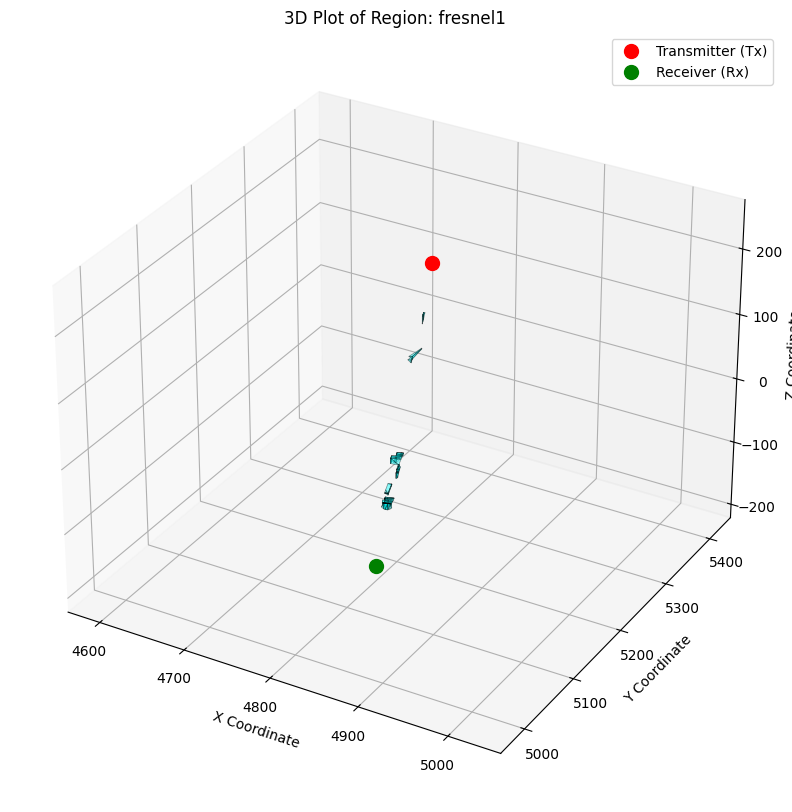

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from pathlib import Path

def plot_poly_regions(npz_file_path):
    """
    Loads polygon regions from an .npz file and generates a 3D plot.
    """
    print(f"Loading data from {npz_file_path}...")
    try:
        # allow_pickle=True is required to load the object array
        data = np.load(npz_file_path, allow_pickle=True)
    except FileNotFoundError:
        print(f"Error: The file '{npz_file_path}' was not found.")
        print("Please check the path and try again.")
        return
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return

    polygons = data['polys']
    tx = data['Tx']
    rx = data['Rx']
    region_name = data.get('region', 'Unknown Region')

    if not isinstance(polygons, np.ndarray) or polygons.dtype != object:
        print("Error: 'polys' key is not a numpy object array as expected.")
        return
        
    if len(polygons) == 0:
        print("Warning: No polygons found in this file to plot.")
    else:
        print(f"Found {len(polygons)} polygons to plot.")

    print(f"Transmitter (Tx) at: {tx}")
    print(f"Receiver (Rx) at: {rx}")

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Add polygons if they exist
    if len(polygons) > 0:
        # --- THE CRITICAL FIX ---
        # Convert the numpy object array to a standard Python list
        # for Poly3DCollection to understand it.
        collection = Poly3DCollection(
            polygons.tolist(), 
            alpha=0.25,
            facecolor='cyan',
            edgecolor='k',
            linewidth=0.5
        )
        ax.add_collection3d(collection)

    # Plot Tx and Rx points
    ax.plot([tx[0]], [tx[1]], [tx[2]], 'ro', markersize=10, label='Transmitter (Tx)')
    ax.plot([rx[0]], [rx[1]], [rx[2]], 'go', markersize=10, label='Receiver (Rx)')
    
    # --- Auto-scaling for equal aspect ratio ---
    try:
        # Collect all points to find the boundaries
        all_points_list = [tx[None, :], rx[None, :]]
        if len(polygons) > 0:
            all_poly_points = np.concatenate(polygons)
            all_points_list.append(all_poly_points)
        
        all_points = np.concatenate(all_points_list)

        # Find the min, max, and center of all points
        min_vals = all_points.min(axis=0)
        max_vals = all_points.max(axis=0)
        centers = (min_vals + max_vals) / 2
        
        # Find the largest range (X, Y, or Z) to make the plot cubic
        max_range = (max_vals - min_vals).max() / 2.0
        if max_range == 0: # Handle case of single point
            max_range = 1.0

        # Set all axes to the same range
        ax.set_xlim(centers[0] - max_range, centers[0] + max_range)
        ax.set_ylim(centers[1] - max_range, centers[1] + max_range)
        ax.set_zlim(centers[2] - max_range, centers[2] + max_range)
    except ValueError:
        # Fallback if something goes wrong with concatenation (e.g., empty file)
        print("Warning: Could not auto-scale axes.")
    # --- End of auto-scaling ---

    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title(f'3D Plot of Region: {region_name}')
    ax.legend()

    # Save the figure
    output_filename = f"{Path(npz_file_path).stem}_plot.png"
    plt.savefig(output_filename, dpi=150)
    print(f"\nPlot saved successfully as '{output_filename}'")
    plt.show() # Added to also display the plot

# --- Run the function ---
# Use a raw string (r"...") to handle the backslashes in the Windows path
file_to_plot = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train\800MHz_Tx_19\pair00056_fresnel1.npz"

# Or, if your .npz file is in the same folder as your script:
# file_to_plot = "pair00000_fresnel1.npz"

plot_poly_regions(file_to_plot)

Loading data from C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train\800MHz_Tx_19\pair00056_fresnel3.npz...
Found 875 polygons to plot.
Transmitter (Tx) at: [4699.36477986 5448.41536661   51.1       ]
Receiver (Rx) at: [4.9203125e+03 4.9525000e+03 1.5000000e+00]

Plot saved successfully as 'pair00056_fresnel3_plot.png'


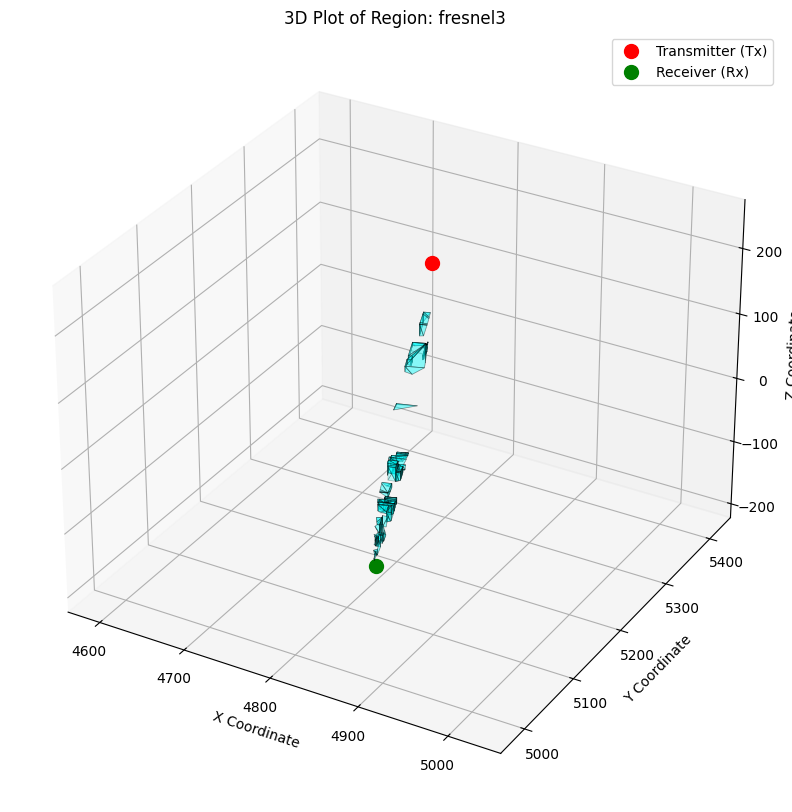

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from pathlib import Path

def plot_poly_regions(npz_file_path):
    """
    Loads polygon regions from an .npz file and generates a 3D plot.
    """
    print(f"Loading data from {npz_file_path}...")
    try:
        # allow_pickle=True is required to load the object array
        data = np.load(npz_file_path, allow_pickle=True)
    except FileNotFoundError:
        print(f"Error: The file '{npz_file_path}' was not found.")
        print("Please check the path and try again.")
        return
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        return

    polygons = data['polys']
    tx = data['Tx']
    rx = data['Rx']
    region_name = data.get('region', 'Unknown Region')

    if not isinstance(polygons, np.ndarray) or polygons.dtype != object:
        print("Error: 'polys' key is not a numpy object array as expected.")
        return
        
    if len(polygons) == 0:
        print("Warning: No polygons found in this file to plot.")
    else:
        print(f"Found {len(polygons)} polygons to plot.")

    print(f"Transmitter (Tx) at: {tx}")
    print(f"Receiver (Rx) at: {rx}")

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Add polygons if they exist
    if len(polygons) > 0:
        # --- THE CRITICAL FIX ---
        # Convert the numpy object array to a standard Python list
        # for Poly3DCollection to understand it.
        collection = Poly3DCollection(
            polygons.tolist(), 
            alpha=0.25,
            facecolor='cyan',
            edgecolor='k',
            linewidth=0.5
        )
        ax.add_collection3d(collection)

    # Plot Tx and Rx points
    ax.plot([tx[0]], [tx[1]], [tx[2]], 'ro', markersize=10, label='Transmitter (Tx)')
    ax.plot([rx[0]], [rx[1]], [rx[2]], 'go', markersize=10, label='Receiver (Rx)')
    
    # --- Auto-scaling for equal aspect ratio ---
    try:
        # Collect all points to find the boundaries
        all_points_list = [tx[None, :], rx[None, :]]
        if len(polygons) > 0:
            all_poly_points = np.concatenate(polygons)
            all_points_list.append(all_poly_points)
        
        all_points = np.concatenate(all_points_list)

        # Find the min, max, and center of all points
        min_vals = all_points.min(axis=0)
        max_vals = all_points.max(axis=0)
        centers = (min_vals + max_vals) / 2
        
        # Find the largest range (X, Y, or Z) to make the plot cubic
        max_range = (max_vals - min_vals).max() / 2.0
        if max_range == 0: # Handle case of single point
            max_range = 1.0

        # Set all axes to the same range
        ax.set_xlim(centers[0] - max_range, centers[0] + max_range)
        ax.set_ylim(centers[1] - max_range, centers[1] + max_range)
        ax.set_zlim(centers[2] - max_range, centers[2] + max_range)
    except ValueError:
        # Fallback if something goes wrong with concatenation (e.g., empty file)
        print("Warning: Could not auto-scale axes.")
    # --- End of auto-scaling ---

    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title(f'3D Plot of Region: {region_name}')
    ax.legend()

    # Save the figure
    output_filename = f"{Path(npz_file_path).stem}_plot.png"
    plt.savefig(output_filename, dpi=150)
    print(f"\nPlot saved successfully as '{output_filename}'")
    plt.show() # Added to also display the plot

# --- Run the function ---
# Use a raw string (r"...") to handle the backslashes in the Windows path
file_to_plot = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train\800MHz_Tx_19\pair00056_fresnel3.npz"

# Or, if your .npz file is in the same folder as your script:
# file_to_plot = "pair00000_fresnel1.npz"

plot_poly_regions(file_to_plot)

In [58]:
import numpy as np

def ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2, epsilon=1e-7):
    """
    Implements the Möller–Trumbore intersection algorithm.
    Tests for intersection between a ray and a triangle.

    Args:
        ray_orig (np.array): Origin of the ray (3,)
        ray_dir (np.array): Normalized direction of the ray (3,)
        v0, v1, v2 (np.array): Vertices of the triangle (3,)

    Returns:
        float or None: The distance 't' from the ray origin to the
                       intersection point, or None if there is no intersection.
    """
    edge1 = v1 - v0
    edge2 = v2 - v0
    
    # Calculate determinant
    h = np.cross(ray_dir, edge2)
    a = np.dot(edge1, h)

    # Check if ray is parallel to the triangle
    if -epsilon < a < epsilon:
        return None

    f = 1.0 / a
    s = ray_orig - v0
    
    # Calculate u (barycentric coordinate)
    u = f * np.dot(s, h)
    if u < 0.0 or u > 1.0:
        return None

    # Calculate v (barycentric coordinate)
    q = np.cross(s, edge1)
    v = f * np.dot(ray_dir, q)
    if v < 0.0 or u + v > 1.0:
        return None

    # At this point, we have an intersection. Calculate t.
    t = f * np.dot(edge2, q)
    
    return t


def count_los_intersections(npz_file_path):
    """
    Loads polygons from an .npz file and counts how many intersect
    the line-of-sight segment between Tx and Rx.
    
    Also finds the distance of the nearest and farthest intersections.
    """
    print(f"Loading data from {npz_file_path}...")
    try:
        data = np.load(npz_file_path, allow_pickle=True)
    except FileNotFoundError:
        print(f"Error: The file '{npz_file_path}' was not found.")
        return

    polygons = data['polys'].tolist() # Convert to list for easier iteration
    tx = data['Tx']
    rx = data['Rx']
    
    if not polygons:
        print("No polygons found in the file.")
        return

    # 1. Define the Line-of-Sight (LOS) Ray
    ray_orig = tx
    los_vector = rx - tx
    ray_len = np.linalg.norm(los_vector) # This is the total distance from Tx to Rx
    ray_dir = los_vector / ray_len      # Normalized direction vector
    
    print(f"Checking {len(polygons)} polygons against LOS ray (length {ray_len:.2f}m)...")

    # Use a dictionary to store {poly_index: intersection_distance_t}
    intersections = {}

    # 2. Loop through every polygon
    for poly_idx, polygon in enumerate(polygons):
        if len(polygon) < 3:
            continue # Not a valid polygon

        # 3. Triangulate the polygon using a simple "fan" method
        #    (V0, V1, V2), (V0, V2, V3), (V0, V3, V4), ...
        v0 = polygon[0]
        for i in range(1, len(polygon) - 1):
            v1 = polygon[i]
            v2 = polygon[i+1]
            
            # 4. Test this single triangle
            t = ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2)
            
            if t is not None:
                # 5. Check if intersection is ON the segment
                #    (t > epsilon) -> not at the TX
                #    (t < ray_len - epsilon) -> not at the RX
                if 1e-7 < t < (ray_len - 1e-7):
                    # Store the distance 't' for this polygon
                    intersections[poly_idx] = t
                    # Once we find one hit, we can stop checking
                    # this polygon's other triangles.
                    break 

    # --- Report Results ---
    count = len(intersections)
    if count > 0:
        # Get all intersection distances
        distances = intersections.values()
        min_dist = min(distances)
        max_dist = max(distances)
        
        # Get indices, sorted by distance
        sorted_indices = [k for k, v in sorted(intersections.items(), key=lambda item: item[1])]

        print(f"\n--- Result ---")
        print(f"Found {count} polygons intersecting the line-of-sight.")
        print(f"Indices of intersecting polygons (sorted by distance): {sorted_indices}")
        print(f"Distance of FIRST polygon from TX: {min_dist:.2f} meters")
        print(f"Distance of LAST polygon from TX: {max_dist:.2f} meters")
        
        return count, min_dist, max_dist
    else:
        print(f"\n--- Result ---")
        print("Clear Line-of-Sight! No polygons intersect the Tx-Rx path.")
        
    return 0, None, None


# --- Run the function ---
file_to_plot = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train\800MHz_Tx_1\pair00010_fresnel1.npz"

# Or if the file is in the same directory:
# file_to_plot = "pair00000_fresnel1.npz"

count_los_intersections(file_to_plot)

Loading data from C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train\800MHz_Tx_1\pair00010_fresnel1.npz...
Checking 138 polygons against LOS ray (length 670.29m)...

--- Result ---
Found 10 polygons intersecting the line-of-sight.
Indices of intersecting polygons (sorted by distance): [12, 28, 15, 10, 13, 26, 84, 103, 88, 107]
Distance of FIRST polygon from TX: 140.43 meters
Distance of LAST polygon from TX: 202.71 meters


(10, np.float64(140.43248092048486), np.float64(202.70671006506134))

In [66]:
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from zipfile import BadZipFile # <-- 1. IMPORT THE ERROR TYPE

# =============================================================================
#  1. RAY-TRIANGLE INTERSECTION LOGIC (Unchanged)
# =============================================================================

def ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2, epsilon=1e-7):
    """Implements the Möller–Trumbore intersection algorithm."""
    edge1 = v1 - v0
    edge2 = v2 - v0
    h = np.cross(ray_dir, edge2)
    a = np.dot(edge1, h)
    if -epsilon < a < epsilon:
        return None
    f = 1.0 / a
    s = ray_orig - v0
    u = f * np.dot(s, h)
    if u < 0.0 or u > 1.0:
        return None
    q = np.cross(s, edge1)
    v = f * np.dot(ray_dir, q)
    if v < 0.0 or u + v > 1.0:
        return None
    t = f * np.dot(edge2, q)
    return t

# =============================================================================
#  2. NPZ PROCESSING FUNCTION (Modified to catch error)
# =============================================================================

def process_npz_file(npz_file_path):
    """
    Loads a single _fresnel3.npz file and calculates LOS features.
    
    Returns a tuple:
    (number_of_polygons, los_intersection_counts, dist_nearest, dist_farthest, los_flag)
    
    Returns "CORRUPT" as the first element if the file is unreadable.
    """
    try:
        data = np.load(npz_file_path, allow_pickle=True)
        polygons = data['polys'].tolist()
        tx = data['Tx']
        rx = data['Rx']
    except FileNotFoundError:
        # File not found. This is fine. 0 polygons, 0 intersections, and it is LOS.
        return 0, 0, np.nan, np.nan, 1
    
    ## --- 2. CATCH THE BadZipFile ERROR --- ##
    except BadZipFile:
        # File is corrupt! Return our special signal string.
        return "CORRUPT", 0, np.nan, np.nan, 1
    
    total_poly_count = len(polygons)
    
    if not polygons:
        # File exists but is empty. Also 0 intersections and LOS.
        return total_poly_count, 0, np.nan, np.nan, 1

    # --- Define the Line-of-Sight (LOS) Ray ---
    ray_orig = tx
    los_vector = rx - tx
    ray_len = np.linalg.norm(los_vector)
    if ray_len < 1e-9:
        return total_poly_count, 0, np.nan, np.nan, 1
    ray_dir = los_vector / ray_len
    
    intersections = {}

    for poly_idx, polygon in enumerate(polygons):
        if len(polygon) < 3:
            continue
        v0 = polygon[0]
        for i in range(1, len(polygon) - 1):
            v1 = polygon[i]
            v2 = polygon[i+1]
            t = ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2)
            if t is not None:
                if 1e-7 < t < (ray_len - 1e-7):
                    intersections[poly_idx] = t
                    break 

    # --- Compile Results ---
    intersection_count = len(intersections)
    
    if intersection_count > 0:
        distances = intersections.values()
        dist_nearest = min(distances)
        dist_farthest = max(distances)
        los_flag = 0  # 0 for NLOS
        return total_poly_count, intersection_count, dist_nearest, dist_farthest, los_flag
    else:
        # No intersections found. This is LOS.
        return total_poly_count, 0, np.nan, np.nan, 1 # 1 for LOS

# =============================================================================
#  3. MAIN PROCESSING LOOP (Modified to handle error)
# =============================================================================

# --- Configuration ---
freqs = ["7GHz", "28GHz"]
txids = [1, 2, 8, 18, 19]

# Base and save directories
region_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train"

# --- Main Loop ---
for freq in freqs:
    for tx_id in txids:
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_train_data.csv")
        npz_dir = os.path.join(region_dir, f"{freq}_Tx_{tx_id}")

        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing feature file: {input_file}")
            continue

        print(f"\n▶ Processing LOS features for {freq} | Tx {tx_id}")
        df = pd.read_csv(input_file)
        
        all_poly_counts = []
        all_intersection_counts = []
        all_dist_nearest = []
        all_dist_farthest = []
        all_los_flags = []
        
        ## --- 3. ADD A LIST TO TRACK CORRUPT FILES --- ##
        corrupt_pair_ids = []

        print(f"  -> Found {len(df)} pairs. Analyzing LOS intersections...")
        
        for pair_id in tqdm(df.index, desc="  Processing Pairs"):
            npz_file = os.path.join(npz_dir, f"pair{pair_id:05d}_fresnel3.npz")
            
            # Calculate all 5 features for this pair
            poly_count, int_count, dist_near, dist_far, los_flag = process_npz_file(npz_file)
            
            ## --- 4. CHECK FOR THE "CORRUPT" SIGNAL --- ##
            if poly_count == "CORRUPT":
                corrupt_pair_ids.append(pair_id)
                # Append default LOS values so the script can continue
                all_poly_counts.append(0)
                all_intersection_counts.append(0)
                all_dist_nearest.append(np.nan)
                all_dist_farthest.append(np.nan)
                all_los_flags.append(1) # Treat as LOS
            else:
                # Append results as normal
                all_poly_counts.append(poly_count)
                all_intersection_counts.append(int_count)
                all_dist_nearest.append(dist_near)
                all_dist_farthest.append(dist_far)
                all_los_flags.append(los_flag)

        # --- Insert new features into the DataFrame ---
        print(f"  -> Augmenting DataFrame with new features...")
        
        ## --- 5. PRINT A WARNING IF ANY FILES WERE CORRUPT --- ##
        if corrupt_pair_ids:
            print(f"  -> ⚠️ WARNING: Encountered {len(corrupt_pair_ids)} corrupt .npz files.")
            print(f"  -> Please regenerate these pairs for {freq}_Tx_{tx_id}:")
            print(f"     {corrupt_pair_ids}")

        try:
            insert_loc = df.columns.get_loc("measured_pathloss_dB")
            
            df.insert(insert_loc, "f3_polygon_count", all_poly_counts)
            df.insert(insert_loc + 1, "los_intersection_count", all_intersection_counts)
            df.insert(insert_loc + 2, "dist_to_first_intersection_m", all_dist_nearest)
            df.insert(insert_loc + 3, "dist_to_last_intersection_m", all_dist_farthest)
            df.insert(insert_loc + 4, "is_los", all_los_flags)
            
            df.to_csv(input_file, index=False)
            print(f"  -> ✅ Successfully saved augmented file to: {input_file}")

        except KeyError:
            print(f"  -> ❌ ERROR: Column 'measured_pathloss_dB' not found in {input_file}. Skipping save.")
        except Exception as e:
            print(f"  -> ❌ ERROR: An unexpected error occurred: {e}. Skipping save.")

print("\n\nAll files processed!")


▶ Processing LOS features for 7GHz | Tx 1
  -> Found 29554 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 29554/29554 [07:44<00:00, 63.63it/s]


  -> Augmenting DataFrame with new features...
  -> ⚠️ WARNING: Encountered 1 corrupt .npz files.
  -> Please regenerate these pairs for 7GHz_Tx_1:
     [428]
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\7GHz_Tx_1_train_data.csv

▶ Processing LOS features for 7GHz | Tx 2
  -> Found 23262 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 23262/23262 [06:19<00:00, 61.24it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\7GHz_Tx_2_train_data.csv

▶ Processing LOS features for 7GHz | Tx 8
  -> Found 24016 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 24016/24016 [06:18<00:00, 63.41it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\7GHz_Tx_8_train_data.csv

▶ Processing LOS features for 7GHz | Tx 18
  -> Found 26405 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 26405/26405 [07:15<00:00, 60.57it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\7GHz_Tx_18_train_data.csv

▶ Processing LOS features for 7GHz | Tx 19
  -> Found 21283 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 21283/21283 [06:21<00:00, 55.81it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\7GHz_Tx_19_train_data.csv

▶ Processing LOS features for 28GHz | Tx 1
  -> Found 29473 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 29473/29473 [07:52<00:00, 62.36it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_1_train_data.csv

▶ Processing LOS features for 28GHz | Tx 2
  -> Found 23043 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 23043/23043 [06:29<00:00, 59.17it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_2_train_data.csv

▶ Processing LOS features for 28GHz | Tx 8
  -> Found 23411 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 23411/23411 [06:41<00:00, 58.38it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_8_train_data.csv

▶ Processing LOS features for 28GHz | Tx 18
  -> Found 26343 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 26343/26343 [11:42<00:00, 37.48it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_18_train_data.csv

▶ Processing LOS features for 28GHz | Tx 19
  -> Found 20833 pairs. Analyzing LOS intersections...


  Processing Pairs: 100%|██████████| 20833/20833 [10:54<00:00, 31.85it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_19_train_data.csv


All files processed!


In [73]:
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from zipfile import BadZipFile 

# =============================================================================
#  1. HELPER FUNCTIONS (Ray-tracing and Area)
# =============================================================================
# (This section is unchanged. Keep your ray_triangle_intersect and 
#  calculate_polygon_area functions as they are.)

def ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2, epsilon=1e-7):
    """Implements the Möller–Trumbore intersection algorithm."""
    edge1 = v1 - v0
    edge2 = v2 - v0
    h = np.cross(ray_dir, edge2)
    a = np.dot(edge1, h)
    if -epsilon < a < epsilon:
        return None
    f = 1.0 / a
    s = ray_orig - v0
    u = f * np.dot(s, h)
    if u < 0.0 or u > 1.0:
        return None
    q = np.cross(s, edge1)
    v = f * np.dot(ray_dir, q)
    if v < 0.0 or u + v > 1.0:
        return None
    t = f * np.dot(edge2, q)
    return t

def calculate_polygon_area(polygon):
    """Calculates the total area of a single 3D polygon."""
    if len(polygon) < 3:
        return 0.0
    total_area = 0.0
    v0 = polygon[0]
    for i in range(1, len(polygon) - 1):
        v1 = polygon[i]
        v2 = polygon[i+1]
        area = 0.5 * np.linalg.norm(np.cross(v1 - v0, v2 - v0))
        total_area += area
    return total_area

# =============================================================================
#  2. UPDATED NPZ PROCESSING FUNCTION (Calculates ONLY areas)
# =============================================================================

def get_new_area_features(npz_file_path):
    """
    Calculates the two new area features by always running the calculations.
    
    Returns a tuple (2 values):
    (fresnel3_obstr_poly_area, los_obstr_poly_area)
    
    Returns "CORRUPT" or "MISSING" on error.
    """
    try:
        data = np.load(npz_file_path, allow_pickle=True)
        polygons = data['polys'].tolist()
        tx = data['Tx']
        rx = data['Rx']
    except FileNotFoundError:
        return "MISSING", 0.0
    except BadZipFile:
        return "CORRUPT", 0.0
    
    if not polygons:
        # No polygons, so both areas are 0.
        return 0.0, 0.0 

    # --- 1. Calculate TOTAL area of ALL polygons ---
    fresnel3_obstr_poly_area = 0.0
    for poly in polygons:
        fresnel3_obstr_poly_area += calculate_polygon_area(poly)

    # --- 2. Calculate LOS-blocking area (ALWAYS RUNS) ---
    los_obstr_poly_area = 0.0
    
    ray_orig = tx
    los_vector = rx - tx
    ray_len = np.linalg.norm(los_vector)
    
    if ray_len < 1e-9:
        # TX and RX are at the same spot, so no intersections.
        return fresnel3_obstr_poly_area, 0.0
        
    ray_dir = los_vector / ray_len

    # This loop will run for all pairs.
    # If it's LOS, it will find no intersections, and los_obstr_poly_area
    # will correctly remain 0.0.
    for polygon in polygons:
        if len(polygon) < 3:
            continue
        v0 = polygon[0]
        for i in range(1, len(polygon) - 1):
            v1 = polygon[i]
            v2 = polygon[i+1]
            t = ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2)
            if t is not None:
                if 1e-7 < t < (ray_len - 1e-7):
                    # This polygon is an obstruction, add its area
                    los_obstr_poly_area += calculate_polygon_area(polygon) 
                    break # Move to next polygon
    
    return fresnel3_obstr_poly_area, los_obstr_poly_area

# =============================================================================
#  3. MAIN PROCESSING LOOP (Unchanged from your last script)
# =============================================================================
# (This section is also unchanged. You can use the existing loop,
#  but you must update the call inside it.)

# --- Configuration ---
freqs = ["800MHz", "7GHz", "28GHz"]
txids = [1, 2, 8, 18, 19]
freqs = ["7GHz"]
txids = [1,2, 8, 18, 19]

# Base and save directories
region_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train"

# --- Main Loop ---
for freq in freqs:
    for tx_id in txids:
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_train_data.csv")
        npz_dir = os.path.join(region_dir, f"{freq}_Tx_{tx_id}")

        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing feature file: {input_file}")
            continue

        print(f"\n▶ Adding Area features to {freq} | Tx {tx_id}")
        df = pd.read_csv(input_file)
        
        if "fresnel3_obstr_poly_area" in df.columns:
             print(f"  -> Columns already exist. Skipping this file.")
             continue
        
        all_total_f3_areas = []
        all_los_obstr_areas = []      
        corrupt_pair_ids = []
        missing_pair_ids = []

        print(f"  -> Found {len(df)} pairs. Calculating areas...")
        
        # We no longer need iterrows, just the index
        for pair_id in tqdm(df.index, desc="  Processing Pairs"):
            
            # We no longer need to read the 'is_los' column
            npz_file = os.path.join(npz_dir, f"pair{pair_id:05d}_fresnel3.npz")
            
            # The function no longer needs 'is_los_from_csv'
            f3_area, los_area = get_new_area_features(npz_file)
            
            if f3_area == "CORRUPT":
                corrupt_pair_ids.append(pair_id)
                all_total_f3_areas.append(0.0)
                all_los_obstr_areas.append(0.0)
            elif f3_area == "MISSING":
                missing_pair_ids.append(pair_id)
                all_total_f3_areas.append(0.0)
                all_los_obstr_areas.append(0.0)
            else:
                all_total_f3_areas.append(f3_area)
                all_los_obstr_areas.append(los_area)

        # --- Insert new features into the DataFrame ---
        print(f"  -> Augmenting DataFrame with new area features...")
        
        if corrupt_pair_ids:
            print(f"  -> ⚠️ WARNING: Encountered {len(corrupt_pair_ids)} corrupt .npz files.")
            print(f"     {corrupt_pair_ids}")
        if missing_pair_ids:
            print(f"  -> ⚠️ WARNING: Encountered {len(missing_pair_ids)} missing .npz files.")

        try:
            insert_loc = df.columns.get_loc("measured_pathloss_dB")
            
            df.insert(insert_loc, "fresnel3_obstr_poly_area", all_total_f3_areas)
            df.insert(insert_loc + 1, "los_obstr_poly_area", all_los_obstr_areas)
            
            df.to_csv(input_file, index=False)
            print(f"  -> ✅ Successfully saved augmented file to: {input_file}")

        except KeyError:
            print(f"  -> ❌ ERROR: Column 'measured_pathloss_dB' not found in {input_file}. Skipping save.")
        except Exception as e:
            print(f"  -> ❌ ERROR: An unexpected error occurred: {e}. Skipping save.")

print("\n\nAll files processed!")


▶ Adding Area features to 7GHz | Tx 1
  -> Columns already exist. Skipping this file.

▶ Adding Area features to 7GHz | Tx 2
  -> Found 23262 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 23262/23262 [08:42<00:00, 44.53it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\7GHz_Tx_2_train_data.csv

▶ Adding Area features to 7GHz | Tx 8
  -> Found 24016 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 24016/24016 [08:53<00:00, 45.04it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\7GHz_Tx_8_train_data.csv

▶ Adding Area features to 7GHz | Tx 18
  -> Found 26405 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 26405/26405 [11:19<00:00, 38.86it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\7GHz_Tx_18_train_data.csv

▶ Adding Area features to 7GHz | Tx 19
  -> Found 21283 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 21283/21283 [09:29<00:00, 37.40it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\7GHz_Tx_19_train_data.csv


All files processed!


In [74]:
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from zipfile import BadZipFile 

# =============================================================================
#  1. HELPER FUNCTIONS (Ray-tracing and Area)
# =============================================================================
# (This section is unchanged. Keep your ray_triangle_intersect and 
#  calculate_polygon_area functions as they are.)

def ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2, epsilon=1e-7):
    """Implements the Möller–Trumbore intersection algorithm."""
    edge1 = v1 - v0
    edge2 = v2 - v0
    h = np.cross(ray_dir, edge2)
    a = np.dot(edge1, h)
    if -epsilon < a < epsilon:
        return None
    f = 1.0 / a
    s = ray_orig - v0
    u = f * np.dot(s, h)
    if u < 0.0 or u > 1.0:
        return None
    q = np.cross(s, edge1)
    v = f * np.dot(ray_dir, q)
    if v < 0.0 or u + v > 1.0:
        return None
    t = f * np.dot(edge2, q)
    return t

def calculate_polygon_area(polygon):
    """Calculates the total area of a single 3D polygon."""
    if len(polygon) < 3:
        return 0.0
    total_area = 0.0
    v0 = polygon[0]
    for i in range(1, len(polygon) - 1):
        v1 = polygon[i]
        v2 = polygon[i+1]
        area = 0.5 * np.linalg.norm(np.cross(v1 - v0, v2 - v0))
        total_area += area
    return total_area

# =============================================================================
#  2. UPDATED NPZ PROCESSING FUNCTION (Calculates ONLY areas)
# =============================================================================

def get_new_area_features(npz_file_path):
    """
    Calculates the two new area features by always running the calculations.
    
    Returns a tuple (2 values):
    (fresnel3_obstr_poly_area, los_obstr_poly_area)
    
    Returns "CORRUPT" or "MISSING" on error.
    """
    try:
        data = np.load(npz_file_path, allow_pickle=True)
        polygons = data['polys'].tolist()
        tx = data['Tx']
        rx = data['Rx']
    except FileNotFoundError:
        return "MISSING", 0.0
    except BadZipFile:
        return "CORRUPT", 0.0
    
    if not polygons:
        # No polygons, so both areas are 0.
        return 0.0, 0.0 

    # --- 1. Calculate TOTAL area of ALL polygons ---
    fresnel3_obstr_poly_area = 0.0
    for poly in polygons:
        fresnel3_obstr_poly_area += calculate_polygon_area(poly)

    # --- 2. Calculate LOS-blocking area (ALWAYS RUNS) ---
    los_obstr_poly_area = 0.0
    
    ray_orig = tx
    los_vector = rx - tx
    ray_len = np.linalg.norm(los_vector)
    
    if ray_len < 1e-9:
        # TX and RX are at the same spot, so no intersections.
        return fresnel3_obstr_poly_area, 0.0
        
    ray_dir = los_vector / ray_len

    # This loop will run for all pairs.
    # If it's LOS, it will find no intersections, and los_obstr_poly_area
    # will correctly remain 0.0.
    for polygon in polygons:
        if len(polygon) < 3:
            continue
        v0 = polygon[0]
        for i in range(1, len(polygon) - 1):
            v1 = polygon[i]
            v2 = polygon[i+1]
            t = ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2)
            if t is not None:
                if 1e-7 < t < (ray_len - 1e-7):
                    # This polygon is an obstruction, add its area
                    los_obstr_poly_area += calculate_polygon_area(polygon) 
                    break # Move to next polygon
    
    return fresnel3_obstr_poly_area, los_obstr_poly_area

# =============================================================================
#  3. MAIN PROCESSING LOOP (Unchanged from your last script)
# =============================================================================
# (This section is also unchanged. You can use the existing loop,
#  but you must update the call inside it.)

# --- Configuration ---
freqs = ["800MHz", "28GHz"]
txids = [1, 2, 8, 18, 19]

# Base and save directories
region_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train"

# --- Main Loop ---
for freq in freqs:
    for tx_id in txids:
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_train_data.csv")
        npz_dir = os.path.join(region_dir, f"{freq}_Tx_{tx_id}")

        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing feature file: {input_file}")
            continue

        print(f"\n▶ Adding Area features to {freq} | Tx {tx_id}")
        df = pd.read_csv(input_file)
        
        if "fresnel3_obstr_poly_area" in df.columns:
             print(f"  -> Columns already exist. Skipping this file.")
             continue
        
        all_total_f3_areas = []
        all_los_obstr_areas = []      
        corrupt_pair_ids = []
        missing_pair_ids = []

        print(f"  -> Found {len(df)} pairs. Calculating areas...")
        
        # We no longer need iterrows, just the index
        for pair_id in tqdm(df.index, desc="  Processing Pairs"):
            
            # We no longer need to read the 'is_los' column
            npz_file = os.path.join(npz_dir, f"pair{pair_id:05d}_fresnel3.npz")
            
            # The function no longer needs 'is_los_from_csv'
            f3_area, los_area = get_new_area_features(npz_file)
            
            if f3_area == "CORRUPT":
                corrupt_pair_ids.append(pair_id)
                all_total_f3_areas.append(0.0)
                all_los_obstr_areas.append(0.0)
            elif f3_area == "MISSING":
                missing_pair_ids.append(pair_id)
                all_total_f3_areas.append(0.0)
                all_los_obstr_areas.append(0.0)
            else:
                all_total_f3_areas.append(f3_area)
                all_los_obstr_areas.append(los_area)

        # --- Insert new features into the DataFrame ---
        print(f"  -> Augmenting DataFrame with new area features...")
        
        if corrupt_pair_ids:
            print(f"  -> ⚠️ WARNING: Encountered {len(corrupt_pair_ids)} corrupt .npz files.")
            print(f"     {corrupt_pair_ids}")
        if missing_pair_ids:
            print(f"  -> ⚠️ WARNING: Encountered {len(missing_pair_ids)} missing .npz files.")

        try:
            insert_loc = df.columns.get_loc("measured_pathloss_dB")
            
            df.insert(insert_loc, "fresnel3_obstr_poly_area", all_total_f3_areas)
            df.insert(insert_loc + 1, "los_obstr_poly_area", all_los_obstr_areas)
            
            df.to_csv(input_file, index=False)
            print(f"  -> ✅ Successfully saved augmented file to: {input_file}")

        except KeyError:
            print(f"  -> ❌ ERROR: Column 'measured_pathloss_dB' not found in {input_file}. Skipping save.")
        except Exception as e:
            print(f"  -> ❌ ERROR: An unexpected error occurred: {e}. Skipping save.")

print("\n\nAll files processed!")


▶ Adding Area features to 800MHz | Tx 1
  -> Found 29554 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 29554/29554 [16:49<00:00, 29.26it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_1_train_data.csv

▶ Adding Area features to 800MHz | Tx 2
  -> Found 23263 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 23263/23263 [15:47<00:00, 24.55it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_2_train_data.csv

▶ Adding Area features to 800MHz | Tx 8
  -> Found 24018 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 24018/24018 [12:15<00:00, 32.63it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_8_train_data.csv

▶ Adding Area features to 800MHz | Tx 18
  -> Found 26406 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 26406/26406 [15:08<00:00, 29.07it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_18_train_data.csv

▶ Adding Area features to 800MHz | Tx 19
  -> Found 21289 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 21289/21289 [17:59<00:00, 19.73it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_19_train_data.csv

▶ Adding Area features to 28GHz | Tx 1
  -> Found 29473 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 29473/29473 [10:53<00:00, 45.11it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_1_train_data.csv

▶ Adding Area features to 28GHz | Tx 2
  -> Found 23043 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 23043/23043 [08:29<00:00, 45.19it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_2_train_data.csv

▶ Adding Area features to 28GHz | Tx 8
  -> Found 23411 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 23411/23411 [08:37<00:00, 45.23it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_8_train_data.csv

▶ Adding Area features to 28GHz | Tx 18
  -> Found 26343 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 26343/26343 [14:26<00:00, 30.39it/s] 


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_18_train_data.csv

▶ Adding Area features to 28GHz | Tx 19
  -> Found 20833 pairs. Calculating areas...


  Processing Pairs: 100%|██████████| 20833/20833 [15:03<00:00, 23.06it/s]


  -> Augmenting DataFrame with new area features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\28GHz_Tx_19_train_data.csv


All files processed!


In [5]:
import pandas as pd
import numpy as np
import os
from zipfile import BadZipFile # For error handling

# -------------------------------------------------------------------
# Configuration
# -------------------------------------------------------------------
freqs = ["800MHz", "7GHz", "28GHz"]
txids = [1, 2, 8, 18, 19]

# Directories
base_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\b_training_propagation_loss"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train"
region_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train"

# -------------------------------------------------------------------
# HELPER FUNCTIONS
# -------------------------------------------------------------------

def calculate_polygon_area(polygon):
    """Calculates the total area of a single 3D polygon."""
    if len(polygon) < 3:
        return 0.0
    total_area = 0.0
    v0 = polygon[0]
    for i in range(1, len(polygon) - 1):
        v1 = polygon[i]
        v2 = polygon[i+1]
        area = 0.5 * np.linalg.norm(np.cross(v1 - v0, v2 - v0))
        total_area += area
    return total_area

def get_tx_sphere_features(npz_file_path):
    """
    Calculates polygon count, total area, and average max height
    from a single tx_sphere50.npz file.
    """
    try:
        data = np.load(npz_file_path, allow_pickle=True)
        polygons = data['polys'].tolist()
    except FileNotFoundError:
        return "MISSING", 0.0, 0.0
    except BadZipFile:
        return "CORRUPT", 0.0, 0.0
    
    if not polygons:
        # No polygons: 0 count, 0 area, 0 height.
        return 0, 0.0, 0.0 

    tx_sphere_poly_count = len(polygons)
    tx_sphere_obstr_poly_area = 0.0
    max_heights_per_polygon = []
    
    for poly in polygons:
        tx_sphere_obstr_poly_area += calculate_polygon_area(poly)
        # Find the max Z-coordinate (height) for this polygon
        max_heights_per_polygon.append(np.max(poly[:, 2]))
    
    # Calculate the average of these maximum heights
    avg_tx_clutter_height = np.mean(max_heights_per_polygon) if max_heights_per_polygon else 0.0
    
    return tx_sphere_poly_count, tx_sphere_obstr_poly_area, avg_tx_clutter_height

# -------------------------------------------------------------------
# Main Loop (Corrected Logic)
# -------------------------------------------------------------------
print("--- Starting Script to Add TX Sphere Features ---")
for freq in freqs:
    for tx_id in txids:
        print(f"\n▶ Processing {freq} | Tx {tx_id}")

        # 1. Define the CSV file path
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_train_data.csv")
        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing CSV file: {input_file}")
            continue

        # 2. Define the SINGLE NPZ file path
        # The TX sphere folder is NOT frequency-dependent
        npz_dir = os.path.join(region_dir, f"tx_sphere_Tx_{tx_id}")
        npz_file = os.path.join(npz_dir, "pair00000_tx_sphere50.npz")

        # 3. Load the CSV
        df = pd.read_csv(input_file)
        print(f"  -> Loaded CSV with {len(df)} rows.")

        # 4. Check if features are already added
        if "avg_tx_clutter_height" in df.columns:
            print(f"  -> Columns already exist. Skipping this file.")
            continue

        # 5. Get the constant features ONCE
        poly_count, total_area, avg_height = get_tx_sphere_features(npz_file)

        if poly_count == "CORRUPT":
            print(f"  -> ❌ ERROR: NPZ file is corrupt: {npz_file}. Skipping.")
            continue
        if poly_count == "MISSING":
            print(f"  -> ❌ ERROR: NPZ file not found: {npz_file}. Skipping.")
            continue

        print(f"  -> Found TX Sphere features: Count={poly_count}, Area={total_area:.2f}, AvgMaxHeight={avg_height:.2f}")

        # 6. Insert new columns (Pandas broadcasts the single value to all rows)
        try:
            insert_loc = df.columns.get_loc("measured_pathloss_dB")
            
            df.insert(insert_loc, "tx_sphere_poly_count", poly_count)
            df.insert(insert_loc + 1, "tx_sphere_obstr_poly_area", total_area)
            df.insert(insert_loc + 2, "avg_tx_clutter_height", avg_height)
            
            # 7. Save the augmented file
            df.to_csv(input_file, index=False)
            print(f"  -> ✅ Successfully added features and saved file: {input_file}")

        except KeyError:
            print(f"  -> ❌ ERROR: Column 'measured_pathloss_dB' not found. Skipping save.")
        except Exception as e:
            print(f"  -> ❌ ERROR: An unexpected error occurred: {e}. Skipping save.")

print("\n\nAll files processed!")

--- Starting Script to Add TX Sphere Features ---

▶ Processing 800MHz | Tx 1
  -> Loaded CSV with 29554 rows.
  -> Columns already exist. Skipping this file.

▶ Processing 800MHz | Tx 2
  -> Loaded CSV with 23263 rows.
  -> Found TX Sphere features: Count=176, Area=18081.63, AvgMaxHeight=43.55
  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_2_train_data.csv

▶ Processing 800MHz | Tx 8
  -> Loaded CSV with 24018 rows.
  -> Found TX Sphere features: Count=87, Area=19942.19, AvgMaxHeight=51.04
  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_8_train_data.csv

▶ Processing 800MHz | Tx 18
  -> Loaded CSV with 26406 rows.
  -> Found TX Sphere features: Count=94, Area=12685.11, AvgMaxHeight=82.40
  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdu

In [7]:
import pandas as pd
import numpy as np
import os
from zipfile import BadZipFile 
from tqdm.auto import tqdm

# -------------------------------------------------------------------
# Configuration
# -------------------------------------------------------------------
freqs = ["800MHz"]
txids = [1, 2, 8, 18, 19]

# --- Overrides for testing (optional) ---

# Directories
base_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\b_training_propagation_loss"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train"
region_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\train"

# --- MODIFIED: Master CSV directory is constant ---
MASTER_CSV_DIR = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\b_training_propagation_loss\800MHz"

# Coordinate shift
xmin = 384592.1875
ymin = 3944795.0

# -------------------------------------------------------------------
# HELPER FUNCTIONS (Unchanged)
# -------------------------------------------------------------------

def calculate_polygon_area(polygon):
    """Calculates the total area of a single 3D polygon."""
    if len(polygon) < 3:
        return 0.0
    total_area = 0.0
    v0 = polygon[0]
    for i in range(1, len(polygon) - 1):
        v1 = polygon[i]
        v2 = polygon[i+1]
        area = 0.5 * np.linalg.norm(np.cross(v1 - v0, v2 - v0))
        total_area += area
    return total_area

def get_sphere_features(npz_file_path):
    """
    Calculates polygon count, total area, and average max height
    from a single ..._sphere50.npz file.
    """
    try:
        data = np.load(npz_file_path, allow_pickle=True)
        polygons = data['polys'].tolist()
    except FileNotFoundError:
        return "MISSING", 0.0, 0.0
    except BadZipFile:
        return "CORRUPT", 0.0, 0.0
    
    if not polygons:
        return 0, 0.0, 0.0 

    poly_count = len(polygons)
    obstr_poly_area = 0.0
    max_heights_per_polygon = []
    
    for poly in polygons:
        obstr_poly_area += calculate_polygon_area(poly)
        max_heights_per_polygon.append(np.max(poly[:, 2]))
    
    avg_clutter_height = np.mean(max_heights_per_polygon) if max_heights_per_polygon else 0.0
    
    return poly_count, obstr_poly_area, avg_clutter_height

# -------------------------------------------------------------------
# Main Loop (Corrected Logic)
# -------------------------------------------------------------------
print("--- Starting Script to Add RX Sphere Features ---")
for freq in freqs:
    for tx_id in txids:
        print(f"\n▶ Processing {freq} | Tx {tx_id}")

        # 1. Define and load the final CSV file to be augmented
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_train_data.csv")
        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing CSV file: {input_file}")
            continue
        df = pd.read_csv(input_file)
        print(f"  -> Loaded CSV with {len(df)} rows.")
        
        if "avg_rx_clutter_height" in df.columns:
            print(f"  -> Columns already exist. Skipping this file.")
            continue

        # 2. Load the RX coordinates from the *training* CSV
        orig_csv_path = os.path.join(base_dir, freq, f"{freq}_Tx_{tx_id}.csv")
        if not os.path.exists(orig_csv_path):
            print(f"⚠️ Missing base file for RX coords: {orig_csv_path}. Skipping.")
            continue
        df_orig = pd.read_csv(orig_csv_path)
        rx_all = df_orig.iloc[:, [6, 7, 8]].values
        rx_all_shifted = rx_all.copy()
        rx_all_shifted[:, 0] -= xmin
        rx_all_shifted[:, 1] -= ymin

        # 3. Load the RX coordinates from the *master* CSV (for lookup)
        # --- MODIFIED: Path is now constant to 800MHz ---
        master_csv_path = os.path.join(MASTER_CSV_DIR, f"800MHz_Tx_{tx_id}.csv")
        if not os.path.exists(master_csv_path):
            print(f"⚠️ Missing master file for lookup: {master_csv_path}. Skipping.")
            continue
        df_master = pd.read_csv(master_csv_path)
        rx_all_master = df_master.iloc[:, [6, 7, 8]].values
        rx_all_master_shifted = rx_all_master.copy()
        rx_all_master_shifted[:, 0] -= xmin
        rx_all_master_shifted[:, 1] -= ymin

        # 4. Build the fast lookup map: { (x,y,z) -> pair_id }
        print("  -> Building coordinate lookup map from 800MHz master file...")
        master_lookup = {
            tuple(np.round(coord, 5)): i 
            for i, coord in enumerate(rx_all_master_shifted)
        }
        print(f"  -> Map built with {len(master_lookup)} unique locations.")

        # 5. Loop through training RX points, find match, and get features
        all_rx_poly_counts = []
        all_rx_obstr_areas = []
        all_rx_clutter_heights = []
        
        # The NPZ folder *is* frequency-specific
        npz_dir = os.path.join(region_dir, f"rx_sphere_Tx_{tx_id}")
        
        print("  -> Matching RX points and processing NPZ files...")
        for rx_pt in tqdm(rx_all_shifted, desc="  Processing RX spheres"):
            rx_sphere_pair_id = master_lookup.get(tuple(np.round(rx_pt, 5)))
            
            if rx_sphere_pair_id is None:
                all_rx_poly_counts.append(0)
                all_rx_obstr_areas.append(0.0)
                all_rx_clutter_heights.append(0.0)
                continue

            npz_file = os.path.join(npz_dir, f"pair{rx_sphere_pair_id:05d}_rx_sphere50.npz")
            poly_count, total_area, avg_height = get_sphere_features(npz_file)

            if poly_count == "CORRUPT" or poly_count == "MISSING":
                all_rx_poly_counts.append(0)
                all_rx_obstr_areas.append(0.0)
                all_rx_clutter_heights.append(0.0)
            else:
                all_rx_poly_counts.append(poly_count)
                all_rx_obstr_areas.append(total_area)
                all_rx_clutter_heights.append(avg_height)
        
        # 6. Insert new columns into the main DataFrame
        try:
            insert_loc = df.columns.get_loc("measured_pathloss_dB")
            
            df.insert(insert_loc, "rx_sphere_poly_count", all_rx_poly_counts)
            df.insert(insert_loc + 1, "rx_sphere_obstr_poly_area", all_rx_obstr_areas)
            df.insert(insert_loc + 2, "avg_rx_clutter_height", all_rx_clutter_heights)
            
            # 7. Save the augmented file
            df.to_csv(input_file, index=False)
            print(f"  -> ✅ Successfully added features and saved file: {input_file}")

        except KeyError:
            print(f"  -> ❌ ERROR: Column 'measured_pathloss_dB' not found. Skipping save.")
        except Exception as e:
            print(f"  -> ❌ ERROR: An unexpected error occurred: {e}. Skipping save.")

print("\n\nAll files processed!")

--- Starting Script to Add RX Sphere Features ---

▶ Processing 800MHz | Tx 1
  -> Loaded CSV with 29554 rows.
  -> Columns already exist. Skipping this file.

▶ Processing 800MHz | Tx 2
  -> Loaded CSV with 23263 rows.
  -> Building coordinate lookup map from 800MHz master file...
  -> Map built with 23263 unique locations.
  -> Matching RX points and processing NPZ files...


  Processing RX spheres: 100%|██████████| 23263/23263 [46:28<00:00,  8.34it/s]   


  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_2_train_data.csv

▶ Processing 800MHz | Tx 8
  -> Loaded CSV with 24018 rows.
  -> Building coordinate lookup map from 800MHz master file...
  -> Map built with 24018 unique locations.
  -> Matching RX points and processing NPZ files...


  Processing RX spheres: 100%|██████████| 24018/24018 [12:55<00:00, 30.99it/s]


  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_8_train_data.csv

▶ Processing 800MHz | Tx 18
  -> Loaded CSV with 26406 rows.
  -> Building coordinate lookup map from 800MHz master file...
  -> Map built with 26406 unique locations.
  -> Matching RX points and processing NPZ files...


  Processing RX spheres: 100%|██████████| 26406/26406 [20:22<00:00, 21.61it/s] 


  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_18_train_data.csv

▶ Processing 800MHz | Tx 19
  -> Loaded CSV with 21289 rows.
  -> Building coordinate lookup map from 800MHz master file...
  -> Map built with 21289 unique locations.
  -> Matching RX points and processing NPZ files...


  Processing RX spheres: 100%|██████████| 21289/21289 [17:39<00:00, 20.10it/s]


  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\train\800MHz_Tx_19_train_data.csv


All files processed!


In [12]:
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from zipfile import BadZipFile 

# =============================================================================
#  1. HELPER FUNCTIONS (Ray-tracing and Area)
# =============================================================================

def ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2, epsilon=1e-7):
    """Implements the Möller–Trumbore intersection algorithm."""
    edge1 = v1 - v0
    edge2 = v2 - v0
    h = np.cross(ray_dir, edge2)
    a = np.dot(edge1, h)
    if -epsilon < a < epsilon:
        return None
    f = 1.0 / a
    s = ray_orig - v0
    u = f * np.dot(s, h)
    if u < 0.0 or u > 1.0:
        return None
    q = np.cross(s, edge1)
    v = f * np.dot(ray_dir, q)
    if v < 0.0 or u + v > 1.0:
        return None
    t = f * np.dot(edge2, q)
    return t

def calculate_polygon_area(polygon):
    """Calculates the total area of a single 3D polygon."""
    if len(polygon) < 3:
        return 0.0
    total_area = 0.0
    v0 = polygon[0]
    for i in range(1, len(polygon) - 1):
        v1 = polygon[i]
        v2 = polygon[i+1]
        area = 0.5 * np.linalg.norm(np.cross(v1 - v0, v2 - v0))
        total_area += area
    return total_area

# =============================================================================
#  2. COMBINED NPZ PROCESSING FUNCTION (Calculates all 7 features)
# =============================================================================

def process_fresnel_file(npz_file_path):
    """
    Loads a single _fresnel3.npz file and calculates all 7
    LOS and Area features in one pass.
    
    Returns a tuple (7 values):
    (poly_count, int_count, dist_near, dist_far, los_flag,
     los_obstr_poly_area, fresnel3_obstr_poly_area)
     
    Returns "CORRUPT" as the first element if the file is unreadable.
    """
    try:
        data = np.load(npz_file_path, allow_pickle=True)
        polygons = data['polys'].tolist()
        tx = data['Tx']
        rx = data['Rx']
    except FileNotFoundError:
        # File not found: 0 polys, 0 intersections, LOS, 0 area
        return 0, 0, np.nan, np.nan, 1, 0.0, 0.0 
    except BadZipFile:
        # File is corrupt
        return "CORRUPT", 0, np.nan, np.nan, 1, 0.0, 0.0
    
    total_poly_count = len(polygons)
    if not polygons:
        # File exists but is empty
        return 0, 0, np.nan, np.nan, 1, 0.0, 0.0

    # --- Define the Line-of-Sight (LOS) Ray ---
    ray_orig = tx
    los_vector = rx - tx
    ray_len = np.linalg.norm(los_vector)

    # --- Initialize accumulators ---
    fresnel3_obstr_poly_area = 0.0
    los_obstr_poly_area = 0.0
    intersections = {} # {poly_index: distance_t}

    # Handle zero-length ray (TX/RX at same spot)
    if ray_len < 1e-9:
        for poly in polygons:
            fresnel3_obstr_poly_area += calculate_polygon_area(poly)
        return total_poly_count, 0, np.nan, np.nan, 1, 0.0, fresnel3_obstr_poly_area
        
    ray_dir = los_vector / ray_len

    # --- Single Main Loop ---
    # Iterate through all polygons ONCE
    for poly_idx, polygon in enumerate(polygons):
        
        # 1. Calculate total area for this polygon
        poly_area = calculate_polygon_area(polygon)
        fresnel3_obstr_poly_area += poly_area
        
        # 2. Run intersection test for this polygon
        if len(polygon) < 3:
            continue
            
        v0 = polygon[0]
        for i in range(1, len(polygon) - 1):
            v1 = polygon[i]
            v2 = polygon[i+1]
            t = ray_triangle_intersect(ray_orig, ray_dir, v0, v1, v2)
            if t is not None:
                if 1e-7 < t < (ray_len - 1e-7):
                    # Intersection found!
                    intersections[poly_idx] = t
                    los_obstr_poly_area += poly_area # Add this poly's area
                    break # Move to next polygon
    
    # --- Compile Final Results ---
    intersection_count = len(intersections)
    
    if intersection_count > 0:
        distances = intersections.values()
        dist_nearest = min(distances)
        dist_farthest = max(distances)
        los_flag = 0  # 0 for NLOS
        return (total_poly_count, intersection_count, dist_nearest, dist_farthest,
                los_flag, los_obstr_poly_area, fresnel3_obstr_poly_area)
    else:
        # No intersections found (LOS)
        return (total_poly_count, 0, np.nan, np.nan, 1,
                0.0, fresnel3_obstr_poly_area) # 1 for LOS

# =============================================================================
#  3. MAIN PROCESSING LOOP (Modified for all 7 features)
# =============================================================================

# --- Configuration ---
freqs = ["800MHz", "7GHz", "28GHz"]
txids = [1, 2, 8, 18, 19]

# Overrides for testing
freqs = ["800MHz"]
txids = [5,9,12,14,20]

# Base and save directories
region_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\test"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test"

# --- Main Loop ---
for freq in freqs:
    for tx_id in txids:
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_test_data.csv")
        npz_dir = os.path.join(region_dir, f"{freq}_Tx_{tx_id}")

        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing feature file: {input_file}")
            continue

        print(f"\n▶ Processing ALL features for {freq} | Tx {tx_id}")
        df = pd.read_csv(input_file)
        
        # Check if columns already exist
        if "f3_polygon_count" in df.columns:
             print(f"  -> Columns already exist. Skipping this file.")
             continue
        
        # Prepare lists for all 7 features
        all_poly_counts = []
        all_intersection_counts = []
        all_dist_nearest = []
        all_dist_farthest = []
        all_los_flags = []
        all_los_obstr_areas = []
        all_total_f3_areas = []
        
        corrupt_pair_ids = []

        print(f"  -> Found {len(df)} pairs. Analyzing all features...")
        
        for pair_id in tqdm(df.index, desc="  Processing Pairs"):
            
            npz_file = os.path.join(npz_dir, f"pair{pair_id:05d}_fresnel3.npz")
            
            # Unpack all 7 features
            (poly_count, int_count, dist_near, dist_far, 
             los_flag, los_area, f3_area) = process_fresnel_file(npz_file)
            
            if poly_count == "CORRUPT":
                corrupt_pair_ids.append(pair_id)
                # Append default values for all 7 features
                all_poly_counts.append(0)
                all_intersection_counts.append(0)
                all_dist_nearest.append(np.nan)
                all_dist_farthest.append(np.nan)
                all_los_flags.append(1) # Treat as LOS
                all_los_obstr_areas.append(0.0)
                all_total_f3_areas.append(0.0)
            else:
                # Append results as normal
                all_poly_counts.append(poly_count)
                all_intersection_counts.append(int_count)
                all_dist_nearest.append(dist_near)
                all_dist_farthest.append(dist_far)
                all_los_flags.append(los_flag)
                all_los_obstr_areas.append(los_area)
                all_total_f3_areas.append(f3_area)

        # --- Insert new features into the DataFrame ---
        print(f"  -> Augmenting DataFrame with new features...")
        
        if corrupt_pair_ids:
            print(f"  -> ⚠️ WARNING: Encountered {len(corrupt_pair_ids)} corrupt .npz files.")
            print(f"     {corrupt_pair_ids}")

        try:
            insert_loc = df.columns.get_loc("measured_pathloss_dB")
            
            # --- MODIFIED: Insert columns in the requested order ---
            df.insert(insert_loc,     "f3_polygon_count", all_poly_counts)
            df.insert(insert_loc + 1, "los_intersection_count", all_intersection_counts)
            df.insert(insert_loc + 2, "dist_to_first_intersection_m", all_dist_nearest)
            df.insert(insert_loc + 3, "dist_to_last_intersection_m", all_dist_farthest)
            df.insert(insert_loc + 4, "is_los", all_los_flags)
            df.insert(insert_loc + 5, "fresnel3_obstr_poly_area", all_total_f3_areas)
            df.insert(insert_loc + 6, "los_obstr_poly_area", all_los_obstr_areas)
            
            df.to_csv(input_file, index=False)
            print(f"  -> ✅ Successfully saved augmented file to: {input_file}")

        except KeyError:
            print(f"  -> ❌ ERROR: Column 'measured_pathloss_dB' not found in {input_file}. Skipping save.")
        except Exception as e:
            print(f"  -> ❌ ERROR: An unexpected error occurred: {e}. Skipping save.")

print("\n\nAll files processed!")


▶ Processing ALL features for 800MHz | Tx 5
  -> Found 23358 pairs. Analyzing all features...


  Processing Pairs: 100%|██████████| 23358/23358 [15:00<00:00, 25.95it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_5_test_data.csv

▶ Processing ALL features for 800MHz | Tx 9
  -> Found 24369 pairs. Analyzing all features...


  Processing Pairs: 100%|██████████| 24369/24369 [18:46<00:00, 21.64it/s] 


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_9_test_data.csv

▶ Processing ALL features for 800MHz | Tx 12
  -> Found 24022 pairs. Analyzing all features...


  Processing Pairs: 100%|██████████| 24022/24022 [10:21<00:00, 38.63it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_12_test_data.csv

▶ Processing ALL features for 800MHz | Tx 14
  -> Found 22961 pairs. Analyzing all features...


  Processing Pairs: 100%|██████████| 22961/22961 [13:38<00:00, 28.05it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_14_test_data.csv

▶ Processing ALL features for 800MHz | Tx 20
  -> Found 22243 pairs. Analyzing all features...


  Processing Pairs: 100%|██████████| 22243/22243 [24:09<00:00, 15.35it/s]


  -> Augmenting DataFrame with new features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_20_test_data.csv


All files processed!


In [19]:
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from zipfile import BadZipFile 
import pickle # <-- 1. IMPORT pickle TO CATCH THE ERROR

# =============================================================================
#  1. HELPER FUNCTION: POLYGON AREA CALCULATION
# =============================================================================

def calculate_polygon_area(polygon):
    """Calculates the total area of a single 3D polygon."""
    if len(polygon) < 3:
        return 0.0
    total_area = 0.0
    v0 = polygon[0]
    for i in range(1, len(polygon) - 1):
        v1 = polygon[i]
        v2 = polygon[i+1]
        area = 0.5 * np.linalg.norm(np.cross(v1 - v0, v2 - v0))
        total_area += area
    return total_area

# =============================================================================
#  2. FRESNEL-1 NPZ PROCESSING FUNCTION (Calculates 2 features)
# =============================================================================

def get_fresnel1_features(npz_file_path):
    """
    Loads a single _fresnel1.npz file and calculates
    f1_poly_count and fresnel1_obstr_poly_area.
    
    Returns a tuple (2 values):
    (f1_poly_count, fresnel1_obstr_poly_area)
    
    Returns "CORRUPT" or "MISSING" on error.
    """
    try:
        data = np.load(npz_file_path, allow_pickle=True)
        polygons = data['polys'].tolist()
    except FileNotFoundError:
        return "MISSING", 0.0
    
    # --- 2. MODIFIED: Catches all corrupt/incomplete file errors ---
    except (BadZipFile, EOFError, pickle.UnpicklingError): 
        return "CORRUPT", 0.0
    
    if not polygons:
        # No polygons, so both count and area are 0.
        return 0, 0.0 

    f1_poly_count = len(polygons)
    f1_obstr_poly_area = 0.0
    for poly in polygons:
        f1_obstr_poly_area += calculate_polygon_area(poly)
    
    return f1_poly_count, f1_obstr_poly_area

# =============================================================================
#  3. MAIN PROCESSING LOOP (F1 Features)
# =============================================================================

# --- Configuration ---
freqs = ["28GHz"]
txids = [20]

# Base and save directories
region_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\test"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test"

# --- Main Loop ---
for freq in freqs:
    for tx_id in txids:
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_test_data.csv")
        npz_dir = os.path.join(region_dir, f"{freq}_Tx_{tx_id}")

        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing feature file: {input_file}")
            continue

        print(f"\n▶ Adding F1 features for {freq} | Tx {tx_id}")
        df = pd.read_csv(input_file)
        
        # Check if columns already exist
        if "f1_polygon_count" in df.columns:
            print(f"  -> F1 columns already exist. Skipping this file.")
            continue
        
        # Prepare lists for the 2 new features
        all_f1_poly_counts = []
        all_f1_obstr_areas = []
        
        corrupt_pair_ids = []
        missing_pair_ids = []

        print(f"  -> Found {len(df)} pairs. Calculating F1 features...")
        
        for pair_id in tqdm(df.index, desc="  Processing Pairs"):
            
            npz_file = os.path.join(npz_dir, f"pair{pair_id:05d}_fresnel1.npz")
            
            f1_count, f1_area = get_fresnel1_features(npz_file)
            
            if f1_count == "CORRUPT":
                corrupt_pair_ids.append(pair_id)
                all_f1_poly_counts.append(0)
                all_f1_obstr_areas.append(0.0)
            elif f1_count == "MISSING":
                missing_pair_ids.append(pair_id)
                all_f1_poly_counts.append(0)
                all_f1_obstr_areas.append(0.0)
            else:
                all_f1_poly_counts.append(f1_count)
                all_f1_obstr_areas.append(f1_area)

        # --- Insert new features into the DataFrame ---
        print(f"  -> Augmenting DataFrame with new F1 features...")
        
        if corrupt_pair_ids:
            print(f"  -> ⚠️ WARNING: Encountered {len(corrupt_pair_ids)} corrupt F1 .npz files.")
            print(f"     {corrupt_pair_ids}")
        if missing_pair_ids:
            print(f"  -> ⚠️ WARNING: Encountered {len(missing_pair_ids)} missing F1 .npz files.")
            print(f"     {missing_pair_ids}")

        try:
            # Find the insertion point *after* 'los_obstr_poly_area'
            insert_loc = df.columns.get_loc("los_obstr_poly_area") + 1
            
            df.insert(insert_loc, "f1_polygon_count", all_f1_poly_counts)
            df.insert(insert_loc + 1, "fresnel1_obstr_poly_area", all_f1_obstr_areas)
            
            df.to_csv(input_file, index=False)
            print(f"  -> ✅ Successfully saved augmented file to: {input_file}")

        except KeyError:
            print(f"  -> ❌ ERROR: Column 'los_obstr_poly_area' not found.")
            print(f"     Please run the Fresnel-3 / LOS script FIRST.")
        except Exception as e:
            print(f"  -> ❌ ERROR: An unexpected error occurred: {e}. Skipping save.")

print("\n\nAll F1 files processed!")


▶ Adding F1 features for 28GHz | Tx 20
  -> Found 21912 pairs. Calculating F1 features...


  Processing Pairs: 100%|██████████| 21912/21912 [04:26<00:00, 82.30it/s]


  -> Augmenting DataFrame with new F1 features...
  -> ✅ Successfully saved augmented file to: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\28GHz_Tx_20_test_data.csv


All F1 files processed!


In [21]:
import pandas as pd
import numpy as np
import os
from zipfile import BadZipFile # For error handling

# -------------------------------------------------------------------
# Configuration
# -------------------------------------------------------------------
freqs = ["800MHz", "7GHz", "28GHz"]
txids = [5,9,12,14,20]

# Directories
base_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\c_evalulation_propagation_loss"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test"
region_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\test"

# -------------------------------------------------------------------
# HELPER FUNCTIONS
# -------------------------------------------------------------------

def calculate_polygon_area(polygon):
    """Calculates the total area of a single 3D polygon."""
    if len(polygon) < 3:
        return 0.0
    total_area = 0.0
    v0 = polygon[0]
    for i in range(1, len(polygon) - 1):
        v1 = polygon[i]
        v2 = polygon[i+1]
        area = 0.5 * np.linalg.norm(np.cross(v1 - v0, v2 - v0))
        total_area += area
    return total_area

def get_tx_sphere_features(npz_file_path):
    """
    Calculates polygon count, total area, and average max height
    from a single tx_sphere50.npz file.
    """
    try:
        data = np.load(npz_file_path, allow_pickle=True)
        polygons = data['polys'].tolist()
    except FileNotFoundError:
        return "MISSING", 0.0, 0.0
    except BadZipFile:
        return "CORRUPT", 0.0, 0.0
    
    if not polygons:
        # No polygons: 0 count, 0 area, 0 height.
        return 0, 0.0, 0.0 

    tx_sphere_poly_count = len(polygons)
    tx_sphere_obstr_poly_area = 0.0
    max_heights_per_polygon = []
    
    for poly in polygons:
        tx_sphere_obstr_poly_area += calculate_polygon_area(poly)
        # Find the max Z-coordinate (height) for this polygon
        max_heights_per_polygon.append(np.max(poly[:, 2]))
    
    # Calculate the average of these maximum heights
    avg_tx_clutter_height = np.mean(max_heights_per_polygon) if max_heights_per_polygon else 0.0
    
    return tx_sphere_poly_count, tx_sphere_obstr_poly_area, avg_tx_clutter_height

# -------------------------------------------------------------------
# Main Loop (Corrected Logic)
# -------------------------------------------------------------------
print("--- Starting Script to Add TX Sphere Features ---")
for freq in freqs:
    for tx_id in txids:
        print(f"\n▶ Processing {freq} | Tx {tx_id}")

        # 1. Define the CSV file path
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_test_data.csv")
        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing CSV file: {input_file}")
            continue

        # 2. Define the SINGLE NPZ file path
        # The TX sphere folder is NOT frequency-dependent
        npz_dir = os.path.join(region_dir, f"tx_sphere_Tx_{tx_id}")
        npz_file = os.path.join(npz_dir, "pair00000_tx_sphere50.npz")

        # 3. Load the CSV
        df = pd.read_csv(input_file)
        print(f"  -> Loaded CSV with {len(df)} rows.")

        # 4. Check if features are already added
        if "avg_tx_clutter_height" in df.columns:
            print(f"  -> Columns already exist. Skipping this file.")
            continue

        # 5. Get the constant features ONCE
        poly_count, total_area, avg_height = get_tx_sphere_features(npz_file)

        if poly_count == "CORRUPT":
            print(f"  -> ❌ ERROR: NPZ file is corrupt: {npz_file}. Skipping.")
            continue
        if poly_count == "MISSING":
            print(f"  -> ❌ ERROR: NPZ file not found: {npz_file}. Skipping.")
            continue

        print(f"  -> Found TX Sphere features: Count={poly_count}, Area={total_area:.2f}, AvgMaxHeight={avg_height:.2f}")

        # 6. Insert new columns (Pandas broadcasts the single value to all rows)
        try:
            insert_loc = df.columns.get_loc("measured_pathloss_dB")
            
            df.insert(insert_loc, "tx_sphere_poly_count", poly_count)
            df.insert(insert_loc + 1, "tx_sphere_obstr_poly_area", total_area)
            df.insert(insert_loc + 2, "avg_tx_clutter_height", avg_height)
            
            # 7. Save the augmented file
            df.to_csv(input_file, index=False)
            print(f"  -> ✅ Successfully added features and saved file: {input_file}")

        except KeyError:
            print(f"  -> ❌ ERROR: Column 'measured_pathloss_dB' not found. Skipping save.")
        except Exception as e:
            print(f"  -> ❌ ERROR: An unexpected error occurred: {e}. Skipping save.")

print("\n\nAll files processed!")

--- Starting Script to Add TX Sphere Features ---

▶ Processing 800MHz | Tx 5
  -> Loaded CSV with 23358 rows.
  -> Found TX Sphere features: Count=346, Area=34059.21, AvgMaxHeight=39.97
  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_5_test_data.csv

▶ Processing 800MHz | Tx 9
  -> Loaded CSV with 24369 rows.
  -> Found TX Sphere features: Count=515, Area=48536.87, AvgMaxHeight=29.28
  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_9_test_data.csv

▶ Processing 800MHz | Tx 12
  -> Loaded CSV with 24022 rows.
  -> Found TX Sphere features: Count=95, Area=13402.59, AvgMaxHeight=40.15
  -> ✅ Successfully added features and saved file: C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test\800MHz_Tx_12_test_data.csv

▶ Processing 800MHz | Tx

In [ ]:
import pandas as pd
import numpy as np
import os
from zipfile import BadZipFile 
from tqdm.auto import tqdm

# -------------------------------------------------------------------
# Configuration
# -------------------------------------------------------------------
freqs = ["800MHz"]
txids = [5,9,12,14,20]

# --- Overrides for testing (optional) ---

# Directories
base_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\c_evaluation_propagation_loss"
save_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\catboost_training\test"
region_dir = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\extracted_regions\test"

# --- MODIFIED: Master CSV directory is constant ---
MASTER_CSV_DIR = r"C:\Users\mkrishne\OneDrive - purdue.edu\ECNDATA\Desktop\PL_competition\c_evaluation_propagation_loss\800MHz"

# Coordinate shift
xmin = 384592.1875
ymin = 3944795.0

# -------------------------------------------------------------------
# HELPER FUNCTIONS (Unchanged)
# -------------------------------------------------------------------

def calculate_polygon_area(polygon):
    """Calculates the total area of a single 3D polygon."""
    if len(polygon) < 3:
        return 0.0
    total_area = 0.0
    v0 = polygon[0]
    for i in range(1, len(polygon) - 1):
        v1 = polygon[i]
        v2 = polygon[i+1]
        area = 0.5 * np.linalg.norm(np.cross(v1 - v0, v2 - v0))
        total_area += area
    return total_area

def get_sphere_features(npz_file_path):
    """
    Calculates polygon count, total area, and average max height
    from a single ..._sphere50.npz file.
    """
    try:
        data = np.load(npz_file_path, allow_pickle=True)
        polygons = data['polys'].tolist()
    except FileNotFoundError:
        return "MISSING", 0.0, 0.0
    except BadZipFile:
        return "CORRUPT", 0.0, 0.0
    
    if not polygons:
        return 0, 0.0, 0.0 

    poly_count = len(polygons)
    obstr_poly_area = 0.0
    max_heights_per_polygon = []
    
    for poly in polygons:
        obstr_poly_area += calculate_polygon_area(poly)
        max_heights_per_polygon.append(np.max(poly[:, 2]))
    
    avg_clutter_height = np.mean(max_heights_per_polygon) if max_heights_per_polygon else 0.0
    
    return poly_count, obstr_poly_area, avg_clutter_height

# -------------------------------------------------------------------
# Main Loop (Corrected Logic)
# -------------------------------------------------------------------
print("--- Starting Script to Add RX Sphere Features ---")
for freq in freqs:
    for tx_id in txids:
        print(f"\n▶ Processing {freq} | Tx {tx_id}")

        # 1. Define and load the final CSV file to be augmented
        input_file = os.path.join(save_dir, f"{freq}_Tx_{tx_id}_test_data.csv")
        if not os.path.exists(input_file):
            print(f"⚠️ Skipping missing CSV file: {input_file}")
            continue
        df = pd.read_csv(input_file)
        print(f"  -> Loaded CSV with {len(df)} rows.")
        
        if "avg_rx_clutter_height" in df.columns:
            print(f"  -> Columns already exist. Skipping this file.")
            continue

        # 2. Load the RX coordinates from the *training* CSV
        orig_csv_path = os.path.join(base_dir, freq, f"{freq}_Tx_{tx_id}.csv")
        if not os.path.exists(orig_csv_path):
            print(f"⚠️ Missing base file for RX coords: {orig_csv_path}. Skipping.")
            continue
        df_orig = pd.read_csv(orig_csv_path)
        rx_all = df_orig.iloc[:, [6, 7, 8]].values
        rx_all_shifted = rx_all.copy()
        rx_all_shifted[:, 0] -= xmin
        rx_all_shifted[:, 1] -= ymin

        # 3. Load the RX coordinates from the *master* CSV (for lookup)
        # --- MODIFIED: Path is now constant to 800MHz ---
        master_csv_path = os.path.join(MASTER_CSV_DIR, f"800MHz_Tx_{tx_id}.csv")
        if not os.path.exists(master_csv_path):
            print(f"⚠️ Missing master file for lookup: {master_csv_path}. Skipping.")
            continue
        df_master = pd.read_csv(master_csv_path)
        rx_all_master = df_master.iloc[:, [6, 7, 8]].values
        rx_all_master_shifted = rx_all_master.copy()
        rx_all_master_shifted[:, 0] -= xmin
        rx_all_master_shifted[:, 1] -= ymin

        # 4. Build the fast lookup map: { (x,y,z) -> pair_id }
        print("  -> Building coordinate lookup map from 800MHz master file...")
        master_lookup = {
            tuple(np.round(coord, 5)): i 
            for i, coord in enumerate(rx_all_master_shifted)
        }
        print(f"  -> Map built with {len(master_lookup)} unique locations.")

        # 5. Loop through training RX points, find match, and get features
        all_rx_poly_counts = []
        all_rx_obstr_areas = []
        all_rx_clutter_heights = []
        
        # The NPZ folder *is* frequency-specific
        npz_dir = os.path.join(region_dir, f"rx_sphere_Tx_{tx_id}")
        
        print("  -> Matching RX points and processing NPZ files...")
        for rx_pt in tqdm(rx_all_shifted, desc="  Processing RX spheres"):
            rx_sphere_pair_id = master_lookup.get(tuple(np.round(rx_pt, 5)))
            
            if rx_sphere_pair_id is None:
                all_rx_poly_counts.append(0)
                all_rx_obstr_areas.append(0.0)
                all_rx_clutter_heights.append(0.0)
                continue

            npz_file = os.path.join(npz_dir, f"pair{rx_sphere_pair_id:05d}_rx_sphere50.npz")
            poly_count, total_area, avg_height = get_sphere_features(npz_file)

            if poly_count == "CORRUPT" or poly_count == "MISSING":
                all_rx_poly_counts.append(0)
                all_rx_obstr_areas.append(0.0)
                all_rx_clutter_heights.append(0.0)
            else:
                all_rx_poly_counts.append(poly_count)
                all_rx_obstr_areas.append(total_area)
                all_rx_clutter_heights.append(avg_height)
        
        # 6. Insert new columns into the main DataFrame
        try:
            insert_loc = df.columns.get_loc("measured_pathloss_dB")
            
            df.insert(insert_loc, "rx_sphere_poly_count", all_rx_poly_counts)
            df.insert(insert_loc + 1, "rx_sphere_obstr_poly_area", all_rx_obstr_areas)
            df.insert(insert_loc + 2, "avg_rx_clutter_height", all_rx_clutter_heights)
            
            # 7. Save the augmented file
            df.to_csv(input_file, index=False)
            print(f"  -> ✅ Successfully added features and saved file: {input_file}")

        except KeyError:
            print(f"  -> ❌ ERROR: Column 'measured_pathloss_dB' not found. Skipping save.")
        except Exception as e:
            print(f"  -> ❌ ERROR: An unexpected error occurred: {e}. Skipping save.")

print("\n\nAll files processed!")